# Capstone Project - The Battle of Neighborhoods (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#Data)
* [Covid-19:India](#Covid19:India)
* [Methodology](#Methodology)
* [Analysis:Mumbai](#Analysis:Mumbai)
* [Results and Discussion](#results)
* [Conclusion](#Conclusion)


## Introduction: Business Problem <a name="introduction"></a>

# <font face="Arial Black">COVID-19 </font>
#### Last Update - 22/04/2020
<b face="Arial">#StayHome,SaveLives</b>
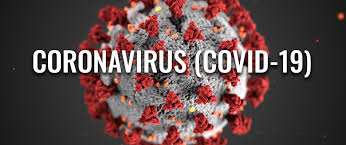

The outbreak was identified in Wuhan, China, in December 2019, declared to be a Public Health Emergency of International Concern on 30 January 2020, and **recognized as a pandemic by the World Health Organization on 11 March 2020**. As of 16 April 2020, more than 2.1 million cases of COVID-19 have been reported in 210 countries and territories, resulting in more than 140,000 deaths. More than 532,000 people have recovered, although there may be a possibility of relapse or reinfection. The deaths per diagnosed cases varies significantly between countries

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. 

Fortunately we are in times of social media and internet to keep us update with all the information, as social media has negative side to, with all fake news making rounds on social media which ill-informs manys

So with this project it is my attempt to plot and visualize correct information from genuine sources to spread correct information. 

Scope of this project is to do **analysis & clustering** on COVID-19 zones in **Mumbai, Maharashtra, India(The most effected city in India)** & further Map testing labs/Hospitals(**Get information using foursquare**) for COVID-19 in mumbai





# Data

Based on definition of our problem, For COVID-19 following are the main data scores:
    
* https://www.kaggle.com/sudalairajkumar/covid19-in-india
* Information tracked on daily basis https://api.covid19india.org/data.jso
* Number of Active Cases/Cured Cases/Deaths
* Data for mumbai covid-19 cases is sourced from http://stopcoronavirus.mcgm.gov.in/  https://github.com/shasaankdave/Coursera_Capstone/blob/master/Containment_Zones_BMC_Mumbai.pdf
* Details about mumbai Pincodes, Area,Borough(Called BMC Wards) are sourced from https://data.gov.in/resources/all-india-pincode-directory-along-contact-details & only mumbai's pincodes & details are extracted.

We decided to use folium maps with latitude & longitude to display covid-19 zones, cluster & testing facilities
Latitude & Longitude based on Pincodes of mumbai are obtained using **Google Maps API geocoding**

**Details about COVID-19 testing labs in mumbai are collect as follows**

* Testing Labs in mumbai are selected using https://www.kaggle.com/sudalairajkumar/covid19-in-india

* Further Details about Hospitals/testing labs are got from **Foursquare API** using **categoryId parameter** in the request URL to select hostipal as venue category 
example venue categoryId for hospitals : “​4bf58dd8d48988d196941735”  
Refer for more details : https://developer.foursquare.com/docs/build-with-foursquare/categories/

## Covid-19:India <a name="Covid19:India"></a>

In [74]:
#importing dependencies
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

In [3]:
#Importing Dependencies
from IPython.core.display import HTML
import folium
import datetime
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import lxml.html as lh
import re
import time
import psutil
import json
from PIL import Image
import os
from os import path
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, Markdown, Latex
import matplotlib as plot
from matplotlib.pyplot import figure
import seaborn as sns

register_matplotlib_converters()
from IPython.display import Markdown

import plotly.offline as py
import plotly.express as px

dataset = pd.DataFrame()

/home/sdave/anaconda3/lib/python3.6/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



# India's Neighbour with Corona :Timeline Visualization

 Visualization Credits: https://flo.uri.sh/story/258632/embed#slide-0

In [4]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed" data-src="story/258632" data-url="https://flo.uri.sh/story/258632/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

## Importing & Groupfy Data by States

In [5]:
df = pd.read_csv('/mnt/d/Coursera_Capstone/covid19/Covid_data_srk/covid_19_india.csv')
data = df.copy()
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno', 'Time'],axis=1,inplace=True)

# collect present data
from datetime import date
data_apr = data[data['Date'] > pd.Timestamp(date(2020,4,12))]

# prepaing data state wise
state_cases = data_apr.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']- state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

In [6]:
state_cases.head()

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,17,0,11,28,0.00,64.71
1,Andhra Pradesh,813,24,120,909,2.95,14.76
2,Arunachal Pradesh,1,0,1,2,0.00,100.00
3,Assam,35,1,19,53,2.86,54.29
4,Bihar,126,2,46,170,1.59,36.51


### Data Credits: https://api.covid19india.org/data.json
Get COVID-19 Data Daily

In [7]:
testingHistory = pd.DataFrame()
testingNO = []
testedPos = []
timeStamp = []
indiaLiveJson = 'https://api.covid19india.org/data.json'
r = requests.get(indiaLiveJson)
indiaData = r.json()

In [8]:
indiaData

{'cases_time_series': [{'dailyconfirmed': '1',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '30 January ',
   'totalconfirmed': '1',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '0',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '31 January ',
   'totalconfirmed': '1',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '0',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '01 February ',
   'totalconfirmed': '1',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '1',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '02 February ',
   'totalconfirmed': '2',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '1',
   'dailydeceased': '0',
   'dailyrecovered': '0',
   'date': '03 February ',
   'totalconfirmed': '3',
   'totaldeceased': '0',
   'totalrecovered': '0'},
  {'dailyconfirmed': '0',
   'dailydeceased': '0',
   'dailyrecovered':

### Creating list for India State/UT

In [9]:
state_lst=state_cases['State/UnionTerritory'].unique().tolist()

### Get India State/UT Co-ordinates using GeoLocator Nominatim API

In [10]:
#Get Statewise Location Co-ordinates using GeoCoder API
lat=[]
long=[]
state_val=[]

#address = 'Mumbai, india'
for state in state_cases['State/UnionTerritory']:
    add= str(state) + ',india'
    address = add
    geolocator = Nominatim(user_agent="can_explorer")
    location = geolocator.geocode(address,timeout=15)
    latitude = lat.append(location.latitude)
    longitude =long.append(location.longitude)
    state_val.append(state)
    print('The geograpical coordinate found for {}.'.format(add))

The geograpical coordinate found for Andaman and Nicobar Islands,india.
The geograpical coordinate found for Andhra Pradesh,india.
The geograpical coordinate found for Arunachal Pradesh,india.
The geograpical coordinate found for Assam,india.
The geograpical coordinate found for Bihar,india.
The geograpical coordinate found for Chandigarh,india.
The geograpical coordinate found for Chhattisgarh,india.
The geograpical coordinate found for Delhi,india.
The geograpical coordinate found for Goa,india.
The geograpical coordinate found for Gujarat,india.
The geograpical coordinate found for Haryana,india.
The geograpical coordinate found for Himachal Pradesh,india.
The geograpical coordinate found for Jammu and Kashmir,india.
The geograpical coordinate found for Jharkhand,india.
The geograpical coordinate found for Jharkhand#,india.
The geograpical coordinate found for Karnataka,india.
The geograpical coordinate found for Kerala,india.
The geograpical coordinate found for Ladakh,india.
The g

In [11]:
map_india= pd.DataFrame({"States": state_val, 
                           "Latitude": lat,
                           "Longitude": long,
                           "Confirmed":list(state_cases['Confirmed']),
                           "Recovered" :list(state_cases['Cured']),
                            "Deaths"   :list(state_cases['Deaths'])})

map_india.head()

,States,Latitude,Longitude,Confirmed,Recovered,Deaths
0,Andaman and Nicobar Islands,10.218834,92.577133,17,11,0
1,Andhra Pradesh,15.924091,80.186381,813,120,24
2,Arunachal Pradesh,27.689171,96.459723,1,1,0
3,Assam,26.407384,93.255130,35,19,1
4,Bihar,25.644085,85.906508,126,46,2


### Get Location Co-Ordinates for India

In [12]:
address = ' India'
geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address,timeout=15)
latitude = location.latitude
longitude =location.longitude
print('The geograpical coordinate found for {} Lat: {} Long:{}'.format(address,latitude,longitude))

The geograpical coordinate found for  India Lat: 22.3511148 Long:78.6677428


### Map India from co-ordinates: Circle Marker size based on number of confirmed cases in State

In [13]:
#_map= folium.Map(location=[latitude, longitude],  zoom_start=4)
covid_map_india=folium.Map(location=[23,80], tiles="Stamen Toner", zoom_start=4)
for lat, long, value, state in zip(map_india['Latitude'], map_india['Longitude'], map_india['Confirmed'], map_india['States']):
    label = '{},{}'.format(state,value)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        #radius=5,
        radius=(int((np.log(value+1.00001))))*3,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(covid_map_india)  

covid_map_india

In [14]:
display(Markdown("** STATE WISE CONFIRMED, DEATH AND CURED CASES of 2019-nCoV**"))
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='YlOrBr',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Purples',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Greens',subset=["Cure Rate (per 100)"])

** STATE WISE CONFIRMED, DEATH AND CURED CASES of 2019-nCoV**

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
19,Maharashtra,5221,251,722,5692,4.81,13.83
9,Gujarat,2272,95,144,2321,4.18,6.34
7,Delhi,2156,47,611,2720,2.18,28.34
28,Rajasthan,1801,25,230,2006,1.39,12.77
29,Tamil Nadu,1596,18,635,2213,1.13,39.79
18,Madhya Pradesh,1592,80,148,1660,5.03,9.3
32,Uttar Pradesh,1412,21,165,1556,1.49,11.69
30,Telengana,945,23,194,1116,2.43,20.53
1,Andhra Pradesh,813,24,120,909,2.95,14.76
16,Kerala,427,3,323,747,0.7,75.64


# From Above Chart it is clear that Maharashtra State of India & Mumbai city in the state has Max. Cases, Hence our problem statement is based on Mumbai City

# Top 5 States with Highest Confirmed cases & Deaths

In [15]:
india_grouped=map_india.groupby('States')['States','Confirmed','Recovered','Deaths'].sum().reset_index()
india_grouped.sort_values(by=['Confirmed','Recovered','Deaths'],inplace=True,ascending=False)
india_head=india_grouped.head()
india_head

,States,Confirmed,Recovered,Deaths
19,Maharashtra,5221,722,251
9,Gujarat,2272,144,95
7,Delhi,2156,611,47
28,Rajasthan,1801,230,25
29,Tamil Nadu,1596,635,18


### States with Most Number of cases

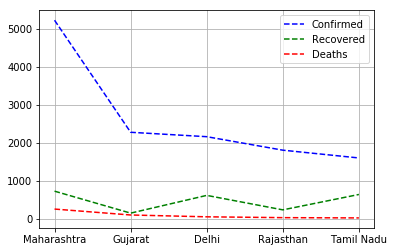

In [16]:
plt.plot(india_head['States'], india_head['Confirmed'], 'b--', label='Confirmed')
plt.plot(india_head['States'], india_head['Recovered'], 'g--', label='Recovered')
plt.plot(india_head['States'], india_head['Deaths'], 'r--', label='Deaths')
plt.grid()
plt.legend() # add legend based on line labels
plt.show()

### Cases to Death Ratio on Plot for all INDIA STATES/UT

/home/sdave/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



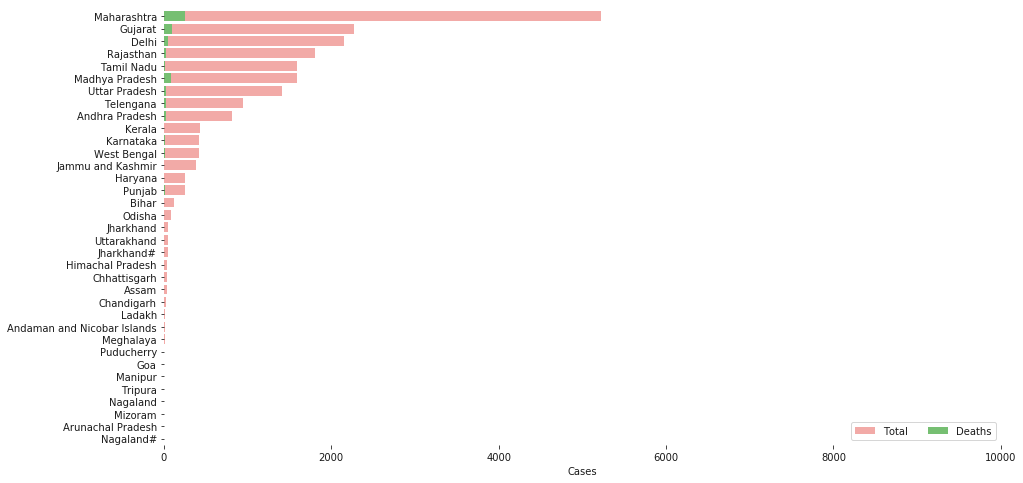

In [17]:
f, ax = plt.subplots(figsize=(15, 8))
data = state_cases[['State/UnionTerritory','Confirmed','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,
            label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Deaths", y="State/UnionTerritory", data=data,
         label="Deaths", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10000), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)
plt.show()

# Let's Have Look at Relations Between Cases & Deaths

### COVID-19 Death History in INDIA

### <font face="Arial Black">COVID-19 India: Analysis, Visualization, And Comparison</font>
#### Last Update - 23/04/2020
![](https://i.imgur.com/6wtDrrQ.png)

In [18]:
india_data=df

In [19]:
india_count_grouped=india_data.groupby('Date')['Date','Confirmed','Deaths','Cured'].sum().reset_index()
india_count_grouped.columns

Index(['Date', 'Confirmed', 'Deaths', 'Cured'], dtype='object')

In [20]:
india_count_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
Date         84 non-null object
Confirmed    84 non-null int64
Deaths       84 non-null int64
Cured        84 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [21]:
#india_count_grouped['Date'] =pd.to_datetime(india_count_grouped['Date'])
#
#df['Date']=pd.to_datetime(df['Date'])
india_count_grouped['Date']=pd.to_datetime(india_count_grouped['Date'])


In [22]:
india_count_grouped.sort_values(by=['Date'], inplace=True)

In [23]:
india_count_grouped.head()

,Date,Confirmed,Deaths,Cured
0,2020-01-02,2,0,0
1,2020-01-03,3,0,0
2,2020-01-04,1834,41,144
80,2020-01-30,1,0,0
82,2020-01-31,1,0,0


In [24]:
#india_count_grouped['Date']=pd.to_datetime(india_count_grouped['Date'].dt.strftime('%m/%d/%Y'))
india_count_grouped['Date'] = pd.to_datetime(india_count_grouped['Date'].dt.strftime('%d/%m/%Y'))

In [25]:
dg= india_count_grouped.groupby(pd.Grouper(key='Date', freq='1M')).sum()
dg.index = dg.index.strftime('%B')
dg

,Confirmed,Deaths,Cured
January,2,0,0
February,86,0,0
March,9687,202,808
April,202759,6350,25621


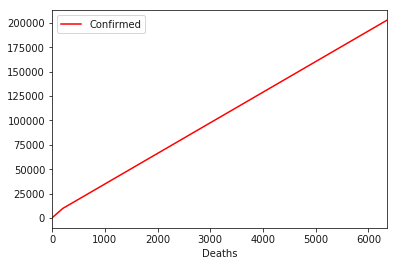

In [26]:
dg.plot(kind='line',x='Deaths',y='Confirmed',color='red')
#df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

# Linear Relationship between Cases & Deaths so Death Cases are Directly Proportional to Confirmed Cases

## From this ground work we know, maximum number of cases are in Maharastra state of india & Mumbai city, Hence we choose to do our capstone project on mumbai city for week 2.

## Methodology <a name="Methodology"></a>

In this project we will direct our efforts on finding covid-19 zones in mumbai and further find details and plot folium maps for: 
* Covid-19 zones in Mumbai, India
* Covid-19 testing facilities in the neighbourhood
* Coivd-19 Clustered for mumbai neighbourhood.


In first step with "**COVID-19:INDIA**" above we tried to analyse covid-19 situation in INDIA with bar plot, line plot & folium maps to get the top effected city, after analysis we found **Mumbai, Maharashtra, India** is the most effected city in india, Hence we selected Mumbai as our neighbourhood for this capstone project.

In Second step we tried get data for hospitals/testing labs in mumbai from source & tried to get details using **foursquare API** and all information for latitude & longitude was obtained using **Geolocator API ** 

In Third step we started with getting information regarding covid-19 zones in mumbai, information is sourced from mumbai municipal corportation website, other needed information regarding postal code was found from government of india site and to have a clear picture of cases in mumbai we grouped mumbai covid zones as per boroughs(Called Wards in Mumbai) and plotted covid zones in mumbai with bar plot & folium maps

In fourth and final step we tried to cluster mumbai covid-19 zone using k-mean clustering, to have clear label on clustering we plot a folium maps for clusters color-coded by cluster numbers. 

## Analysis:Mumbai <a name="Analysis:Mumbai"></a>

In [27]:
#Start with Postal code imports
mumbai_pincodes=pd.read_csv('./Mumbai_Data/Mumbai_Pincodes_latitude_longitude.csv')
mumbai_pincodes.head()
mumbai_pincodes.shape

(111, 10)

In [28]:
#Read Covid-19 zones in Mumbai sourced from :http://stopcoronavirus.mcgm.gov.in/
# https://github.com/shasaankdave/Coursera_Capstone/blob/master/Containment_Zones_BMC_Mumbai.pdf
covid_zones_mumbai=pd.read_csv('./Mumbai_Data/Covid_Zones_Mumbai.csv')
covid_zones_mumbai.head()

,Ward,Pincode,Address
0,A,400001,"Blossoms,ModiStrret,OppFishMarket,Fort"
1,A,400001,"Sahayog,5,MintRoad,OppGpo,Fort"
2,A,400005,"AbbasBuilding,BKBomanBehramMarg,BackSideOfTajH..."
3,A,400005,"BandusCourt,1StPastaLane,Colaba"
4,A,400005,"GaneshmurthiNagarPartNo1,3,CaptainPrakashPethe..."


In [29]:
#Merging Covid zones & mumbai pincode data to get covid zones latitude & Longitude
covid19_mumbai=covid_zones_mumbai.merge(mumbai_pincodes,how='left',on='Pincode',validate='m:1')

In [30]:
#Comprehensive dataset of covid-19 cases in mumbai uptill 18th April
#Source: http://stopcoronavirus.mcgm.gov.in/
covid19_mumbai.head()

,Ward,Pincode,Address,Unnamed: 0,Area,State,Number,Region,Area_Tag,Latitude,Longitude,BMC_Ward
0,A,400001,"Blossoms,ModiStrret,OppFishMarket,Fort",1.0,Mumbai G.P.O.,Maharashtra,16.0,Mumbai,Mumbai,18.6291,72.8919,NaN
1,A,400001,"Sahayog,5,MintRoad,OppGpo,Fort",1.0,Mumbai G.P.O.,Maharashtra,16.0,Mumbai,Mumbai,18.6291,72.8919,NaN
2,A,400005,"AbbasBuilding,BKBomanBehramMarg,BackSideOfTajH...",5.0,Colaba,Maharashtra,16.0,Mumbai,Mumbai,18.9069,72.8106,NaN
3,A,400005,"BandusCourt,1StPastaLane,Colaba",5.0,Colaba,Maharashtra,16.0,Mumbai,Mumbai,18.9069,72.8106,NaN
4,A,400005,"GaneshmurthiNagarPartNo1,3,CaptainPrakashPethe...",5.0,Colaba,Maharashtra,16.0,Mumbai,Mumbai,18.9069,72.8106,NaN


# Hospitals/testing Labs in Mumbai

In [32]:
#Looking at Testing labs from india's list & extract mumbai's data
testing_labs_india=pd.read_csv('./covid19/Covid_data_srk/ICMRTestingLabs.csv')
testing_labs_india.rename(columns={"pincode": "Pincode"},inplace=True)
mumbai_testing_labs=testing_labs_india.loc[testing_labs_india['city']== 'Mumbai']
mumbai_testing_labs.head()

,lab,address,Pincode,city,state,type
113,"Seth GS Medical College & KEM Hospital, Mumbai","Seth GS Medical College & KEM Hospital, Achary...",400012,Mumbai,Maharashtra,Government Laboratory
114,"Kasturba Hospital for Infectious Diseases, Mumbai","Kasturba Hospital for Infectious Diseases, San...",400034,Mumbai,Maharashtra,Government Laboratory
115,"National Institute of Virology Field Unit, Mumbai","National Institute of Virology Field Unit, Haf...",400012,Mumbai,Maharashtra,Government Laboratory
119,"Grant Medical College & Sir JJ Hospital, Mumbai","Grant Medical College & Sir JJ Hospital, J J M...",400008,Mumbai,Maharashtra,Government Laboratory
122,"Haffkine Institute, Mumbai","Haffkine Institute, Acharya Donde Marg, Parel,...",400012,Mumbai,Maharashtra,Government Laboratory


In [33]:
#Map Mumbai's Testing labs with latitude & Longitude:Key{PinCode}
mumbai_labs_ll=mumbai_testing_labs.merge(mumbai_pincodes,how='left',on='Pincode',validate='m:1')
mumbai_labs_ll.head()

,lab,address,Pincode,city,state,type,Unnamed: 0,Area,State,Number,Region,Area_Tag,Latitude,Longitude,BMC_Ward
0,"Seth GS Medical College & KEM Hospital, Mumbai","Seth GS Medical College & KEM Hospital, Achary...",400012,Mumbai,Maharashtra,Government Laboratory,54.0,Parel Rly Work Shop,Maharashtra,16.0,Mumbai,NaN,19.0000,72.8333,NaN
1,"Kasturba Hospital for Infectious Diseases, Mumbai","Kasturba Hospital for Infectious Diseases, San...",400034,Mumbai,Maharashtra,Government Laboratory,111.0,Tulsiwadi,Maharashtra,16.0,Mumbai,Mumbai,19.0167,72.8500,NaN
2,"National Institute of Virology Field Unit, Mumbai","National Institute of Virology Field Unit, Haf...",400012,Mumbai,Maharashtra,Government Laboratory,54.0,Parel Rly Work Shop,Maharashtra,16.0,Mumbai,NaN,19.0000,72.8333,NaN
3,"Grant Medical College & Sir JJ Hospital, Mumbai","Grant Medical College & Sir JJ Hospital, J J M...",400008,Mumbai,Maharashtra,Government Laboratory,8.0,Kamathipura,Maharashtra,16.0,Mumbai,Mumbai,18.6291,72.8919,NaN
4,"Haffkine Institute, Mumbai","Haffkine Institute, Acharya Donde Marg, Parel,...",400012,Mumbai,Maharashtra,Government Laboratory,54.0,Parel Rly Work Shop,Maharashtra,16.0,Mumbai,NaN,19.0000,72.8333,NaN


# Found Latitude on Longitude reported Above as not correct.
## Hence Use GeoLocator API to get authentic Latitude & Longitude

In [35]:
lat=[]
long=[]
pincd=[]

#address = 'Mumbai, india'
for pincode in mumbai_labs_ll['Pincode']:
    add= str(pincode) + ',india'
    address = add
    geolocator = Nominatim(user_agent="can_explorer")
    location = geolocator.geocode(address,timeout=15)
    latitude = lat.append(location.latitude)
    longitude =long.append(location.longitude)
    pincd.append(pincode)
    print('The geograpical coordinate found for {}.'.format(add))

The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 400034,india.
The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 400008,india.
The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 444001,india.
The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 400053,india.
The geograpical coordinate found for 400070,india.
The geograpical coordinate found for 400062,india.
The geograpical coordinate found for 411004,india.
The geograpical coordinate found for 400053,india.
The geograpical coordinate found for 400072,india.
The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 400092,india.
The geograpical coordinate found for 400080,india.
The geograpical coordinate found for 400016,india.
The geograpical coordinate found for 400064,india.
The geograpical coordinate found for 400016,india.


### Preprocessing Data before Mapping 

In [36]:
Mumbai_covid_labs = pd.DataFrame({"Pincode": pincd, 
                           "Latitude": lat,
                           "Longitude": long})

Mumbai_covid_labs.head()
Mumbai_covid_labs.drop_duplicates('Pincode',inplace=True)

In [38]:
mumbai_labs_final=mumbai_testing_labs.merge(Mumbai_covid_labs,how='left',on='Pincode',validate='m:1')
mumbai_labs_final.dropna(inplace=True)
mumbai_labs_final.head()

,lab,address,Pincode,city,state,type,Latitude,Longitude
0,"Seth GS Medical College & KEM Hospital, Mumbai","Seth GS Medical College & KEM Hospital, Achary...",400012,Mumbai,Maharashtra,Government Laboratory,19.000795,72.840147
1,"Kasturba Hospital for Infectious Diseases, Mumbai","Kasturba Hospital for Infectious Diseases, San...",400034,Mumbai,Maharashtra,Government Laboratory,18.976686,72.812367
2,"National Institute of Virology Field Unit, Mumbai","National Institute of Virology Field Unit, Haf...",400012,Mumbai,Maharashtra,Government Laboratory,19.000795,72.840147
3,"Grant Medical College & Sir JJ Hospital, Mumbai","Grant Medical College & Sir JJ Hospital, J J M...",400008,Mumbai,Maharashtra,Government Laboratory,18.970566,72.833956
4,"Haffkine Institute, Mumbai","Haffkine Institute, Acharya Donde Marg, Parel,...",400012,Mumbai,Maharashtra,Government Laboratory,19.000795,72.840147


In [39]:
#Get Location co-ordinates for MUMBAI
address = ' Mumbai,India'
geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address,timeout=15)
latitude = location.latitude
longitude =location.longitude
print('The geograpical coordinate found for {} Lat: {} Long:{}'.format(address,latitude,longitude))

The geograpical coordinate found for  Mumbai,India Lat: 18.9387711 Long:72.8353355


### Find Data for Hospitals using FourSquare Location API
Category ID is used to find a particular type of veune in neighbourhood Refer https://developer.foursquare.com/docs/build-with-foursquare/categories/ for more details on venue category Ids Category Id for **Hospitals = 4bf58dd8d48988d196941735 **

In [41]:
#FourSquare API Parameter SetUp

LIMIT = 100

CLIENT_ID = 'ZVLUP1PU41P2XVZN1R15EWMRBMOUU5MA3HTHOYKFKZTHWMYJ' # your Foursquare ID
CLIENT_SECRET = 'ST0MKT1KNGXTV5PXYGRDHNUHA5XRYKTM5V4NGUQG4FHEP245' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
CATEGORYID='4bf58dd8d48988d196941735' #venueid for hospitals

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
lat='19.25023195'
lng='73.16017493'
radius=500

Your credentails:
CLIENT_ID: ZVLUP1PU41P2XVZN1R15EWMRBMOUU5MA3HTHOYKFKZTHWMYJ
CLIENT_SECRET:ST0MKT1KNGXTV5PXYGRDHNUHA5XRYKTM5V4NGUQG4FHEP245


In [42]:
 # create the API request URL
radius=500
latitude=19.0025 #Mumbai
longitude=72.8421 #Mumbai
#for latitude,longitude in zip(mumbai_covid_clusters['Latitude'],mumbai_covid_clusters['Longitude']):
url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CATEGORYID,CLIENT_ID,  CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
results = requests.get(url).json()["response"]#['groups'][0]['items']
    #results = requests.get(url).json()
results

{'confident': False,
 'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
      'suffix': '.png'},
     'id': '4bf58dd8d48988d196941735',
     'name': 'Hospital',
     'pluralName': 'Hospitals',
     'primary': True,
     'shortName': 'Hospital'}],
   'hasPerk': False,
   'id': '4dd672981f6ee1468309251d',
   'location': {'address': 'Dr E Borges Marg, Parel',
    'cc': 'IN',
    'city': 'Mumbai',
    'country': 'India',
    'distance': 88,
    'formattedAddress': ['Dr E Borges Marg, Parel',
     'Mumbai',
     'Mahārāshtra',
     'India'],
    'labeledLatLngs': [{'label': 'display',
      'lat': 19.00264397391697,
      'lng': 72.8412751306918}],
    'lat': 19.00264397391697,
    'lng': 72.8412751306918,
    'state': 'Mahārāshtra'},
   'name': 'KEM Hospital',
   'referralId': 'v-1587973627'},
  {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
      'suffix': '.png'},
     'id': '4bf58dd

In [43]:
#Plot Mumbai COVID testing Labs
mumbai_labs= folium.Map(location=[latitude, longitude], zoom_start=9)
for lat, lng, Pincode, lab,typeh in zip(mumbai_labs_final['Latitude'], mumbai_labs_final['Longitude'], mumbai_labs_final['Pincode'], mumbai_labs_final['lab'],mumbai_labs_final['type']):
    label = '{}, {},{}'.format(Pincode,lab,typeh)
    label = folium.Popup(label, parse_html=True)
    if typeh =='Private Laboratory':
        val='blue'
    else:
        val='green'
    

    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=val,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mumbai_labs)  

mumbai_labs

### Green Points for Government testing labs & Blue for Non-Government Testing Labs


### Step 3: Mumbai COVID-19 Zones

In [46]:
#Get Data to Start with covid zones
covid19_zones=covid19_mumbai
covid19_zones.drop_duplicates('Pincode',inplace=True)
covid19_zones.shape

(81, 12)

In [47]:
covid19_zones.head()

,Ward,Pincode,Address,Unnamed: 0,Area,State,Number,Region,Area_Tag,Latitude,Longitude,BMC_Ward
0,A,400001,"Blossoms,ModiStrret,OppFishMarket,Fort",1.0,Mumbai G.P.O.,Maharashtra,16.0,Mumbai,Mumbai,18.6291,72.8919,NaN
2,A,400005,"AbbasBuilding,BKBomanBehramMarg,BackSideOfTajH...",5.0,Colaba,Maharashtra,16.0,Mumbai,Mumbai,18.9069,72.8106,NaN
11,A,400020,"BirlaMatoshreeQuarters,BomabyHospitalPremises,...",73.0,Central Building,Maharashtra,16.0,Mumbai,Mumbai,18.9860,72.8259,NaN
12,A,400021,"GaribJanataNagar,BadhwarPark,CaptainPrakashPet...",74.0,Nariman Point,Maharashtra,16.0,Mumbai,Mumbai,18.9274,72.8241,NaN
14,B,400003,"HajiMansion,TantanpuraRd,",3.0,Mandvi (Mumbai),Maharashtra,16.0,Mumbai,NaN,18.9500,72.8333,NaN


In [49]:
#Get Overview of effected Wards(boroughs) in Mumbai
zn=covid19_zones['Ward'].unique()
zn

array(['A ', 'B ', 'C ', 'D ', 'E ', 'FN', 'GN', 'GS', 'HE', 'HW', 'KW',
       'L ', 'ME', 'MW', 'N ', 'PN', 'PS', 'RC', 'RS', 'S ', 'T '],
      dtype=object)

### <font face="Arial Black">COVID-19 Mumbai Overview</font>
**Image credit http://stopcoronavirus.mcgm.gov.in/ **
#### Last Update - 23/04/2020
![](https://d2c7ipcroan06u.cloudfront.net/wp-content/uploads/2020/04/Image-1-TS.jpg)

In [51]:
# PreProcessing data for plotting:
covid19_zones
covid19_zones.dropna(subset=['Latitude', 'Longitude'],inplace=True)

In [54]:
#Plot Mumbai City Covid-19 Zones on Map using folium
mumbai_19= folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(21)
ys = [i + x + (i*x)**2 for i in range(21)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lng, Pincode,ward,address in zip(covid19_zones['Latitude'], covid19_zones['Longitude'], covid19_zones['Pincode'], covid19_zones['Ward'],covid19_zones['Address']):
    label = '{}, {},{}'.format(Pincode,ward,address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mumbai_19)  

mumbai_19

## South Mumbai is Mostly effected region

In [57]:
# Preprocessing for Wards
covid_mumbai_wards=covid_zones_mumbai
covid_mumbai_wards.shape

(721, 3)

In [58]:
ward_group=covid_mumbai_wards.groupby('Ward')['Address'].count().reset_index()

In [59]:
ward_group.rename(columns={"Address": "Cases_Count"},inplace=True)

In [60]:
ward_group.columns

Index(['Ward', 'Cases_Count'], dtype='object')

### Plot Ward-wise Counts : Bar Plot

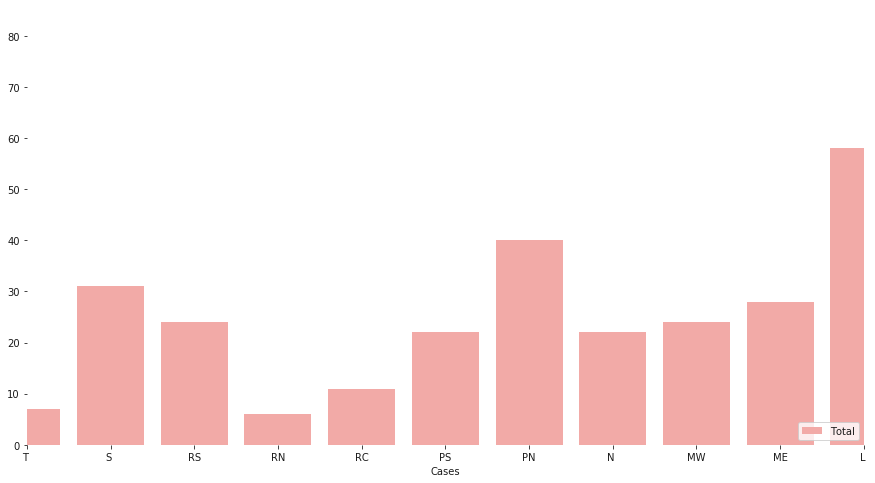

In [61]:
#Plotting Ward-wise Count:
f, ax = plt.subplots(figsize=(15, 8))
data = ward_group[['Ward','Cases_Count']]
data.sort_values('Ward',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Ward", y="Cases_Count", data=data,
            label="Total", color="r")

            

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)
plt.show()

# Step 4: Mumbai Clustering & Visualization

## Read_Data & Pre-processing

In [63]:
postal_cd=mumbai_pincodes

In [65]:
mum_postal_cd=postal_cd.loc[postal_cd['Region']== 'Mumbai']
mum_postal_cd.columns

Index(['Unnamed: 0', 'Pincode', ' Area', 'State', 'Number', 'Region',
       'Area_Tag', 'Latitude', 'Longitude', 'BMC_Ward'],
      dtype='object')

In [66]:
mum_final=mum_postal_cd[['Pincode',' Area']]
mum_final.shape

(89, 2)

In [67]:
zones=covid_zones_mumbai.groupby('Pincode')['Address'].count().reset_index()
zones.head()

,Pincode,Address
0,400001,2
1,400003,18
2,400004,7
3,400005,9
4,400006,2


In [68]:
zones.rename(columns={"Address": "Cases_Count"},inplace=True)
zones.columns

Index(['Pincode', 'Cases_Count'], dtype='object')

In [70]:
#Data Frame to be used for clustering
model_mum=mum_final.merge(zones,how='left',on='Pincode') 
model_mum.head()

,Pincode,Area,Cases_Count
0,400001,Mumbai G.P.O.,2.0
1,400002,Thakurdwar,NaN
2,400003,Mandvi (Mumbai),18.0
3,400004,Madhavbaug,7.0
4,400005,Colaba,9.0


In [71]:
model_mum["Cases_Count"].fillna(0.0, inplace = True) 

In [73]:
# Final DataFrame as clustering input
model_mum1=model_mum[['Pincode','Cases_Count']]

## K-Mean Clustering on COVID-19 zones in Mumbai

In [75]:
kclusters = 3

clustering_covid_mumbai = model_mum1

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering_covid_mumbai)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:80]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Pre-Processing For Plotting

In [93]:
pincd_lst=mum_postal_cd['Pincode'].unique().tolist()
covid_lat_lst=mum_postal_cd['Latitude'].tolist()
covid_long_lst=mum_postal_cd['Longitude'].tolist()

In [94]:
cluster_labels=kmeans.labels_[0:]

In [95]:
cluster_lst=cluster_labels.tolist()
#=cluster_labels

In [96]:
len(cluster_lst)

89

In [98]:
len(covid_long_lst)

89

In [99]:
len(covid_lat_lst)

89

In [100]:
len(pincd_lst)

89

In [101]:
mumbai_covid_clusters=pd.DataFrame({"Pincode": pincd_lst, 
                           "Latitude": covid_lat_lst,
                           "Longitude":covid_long_lst,
                           "Cluster_label":cluster_lst,
                            })
mumbai_covid_clusters.head()

,Pincode,Latitude,Longitude,Cluster_label
0,400001,18.6291,72.8919,2
1,400002,17.0509,73.2910,2
2,400003,18.9500,72.8333,2
3,400004,18.9500,72.8167,2
4,400005,18.9069,72.8106,2


In [102]:
mumbai_clust=mumbai_covid_clusters.merge(covid_zones_mumbai,how='left',on='Pincode')

In [103]:
#Finally Plotting Clusters for Mumbai Covid-19 Zone
map_clusters = folium.Map(location=[latitude, longitude],tiles="Stamen Toner", zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
color_code = ['green','blue','red']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_covid_clusters['Latitude'], mumbai_covid_clusters['Longitude'], mumbai_covid_clusters['Pincode'], mumbai_covid_clusters['Cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if cluster != 'Nan':
        val=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_code[val],
        fill=True,
        fill_color=rainbow[val-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="Results"></a>

### Our Analysis show following are the insights:
* Total Number of covid-19 cases in India : 27892
* Total Number of covid-19 cases in mumbai: 5407  src: https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Maharashtra
* Around 20% of totals india's cases are in mumbai with around 17 Hospitals/testing labs(3 Government/14 Non-Government Labs)

**Tops 5 BMC Ward effected by COVID-19 from total 11 wards are:**
* L Ward
* PN Ward
* S Ward 
* ME Ward 
* MW Ward

Mumbai City is most populated city in india with population of **20,411,274** Source:https://worldpopulationreview.com/world-cities/mumbai-population/ , with very densily populated slums around and as **Mumbai** is epicenter for COVID-19 in india currently with around 20% cases of india's number, it is highly on the risk of getting into phase 3(Community transmission).

Mumbai city has around 1000 diagnostic centre and only 17 are catering for COVID-19 which is very few in number & for such pandemic situation and for epicenter like mumbai testing facilities should be increased for quick assessment, rapid testing and stop the spread of virus. 

## Conclusion <a name="Conclusion"></a>

Purpose of this project was to start analysing COVID-19 situation in India & pickup the city which has the most number of corona positive cases, Further to put the analysis & visuzlation sourced from authentic sources to avoid fake information & inform people well.

Mumbai was identified as epicenter city for current corona pandemic with around 20% share alone by this city for total number of case in india, further information about testing center was mapped with cases to know relation between number of cases vs testing labs.

Based upon this analysis it was found that for common man testing facilities for COVID-19 in the city of mumbai should be increases looking at the current number.

Finally I would say!!
# STAY HOME #STAY SAFE

# <font face="Arial Black">COVID-19 India Guidelines</font>

<b face="Arial">#StayHome,SaveLives</b>
![](https://thespinoff.co.nz/wp-content/uploads/2020/03/Covid-19-Handshake-Alternatives-v3.gif)
Image Source: greenpeace.org